# 퍼셉트론에서 신경망으로
 - 앞에서 구현한 퍼셉트론은 장단점을 가지고 있다. 장점은 복잡한 함수도 표현할 수 있다는 것과 단점은 아직은 수동으로 가중치를 부여해야 한다는 점이다. 앞서 구현한 AND, OR, NAND, XOR, 모두 인간이 수동으로 가중치를 부여하였다.
 
 
 - 이러한 단점을 해결해준 것이 바로 신경마이다. 신경망은 가중치 매개변수의 적절한 갓을 데이터로부터 자동으로 학습하는 능력을 가지고 있다.

# 신경망의 예

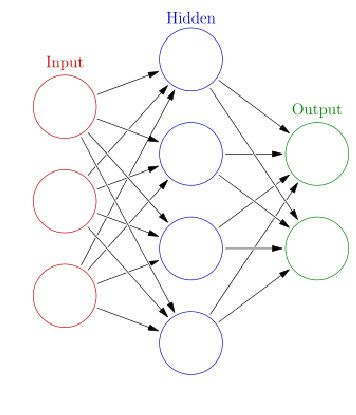

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread("./Image/neural_net.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위의 그림은 신경망을 그림으로 나타낸 것이다.
 - 맨 왼쪽을 입력층(Inpue), 맨 오른쪽을 출력층(Output), 나머지 가운데를 은닉층(Hidden)이라고 부른다.
 - 은닉층의 뉴런은 입력층이나 출력층과 달리 사람 눈에는 보이지 않는다. 그래서 "은닉"인 것이다.
 - 일반적으로 입력층을 0층, 은닉층을 1충, 출력층을 2층이라고 한다. 파이썬의 인덱스가 0부터 시작하기 때문이 편하기 때문이다.

 - 위의 신경망은 앞서 본 퍼셉트론과 특별히 달라 보이지 않는다.

# 퍼셉트론

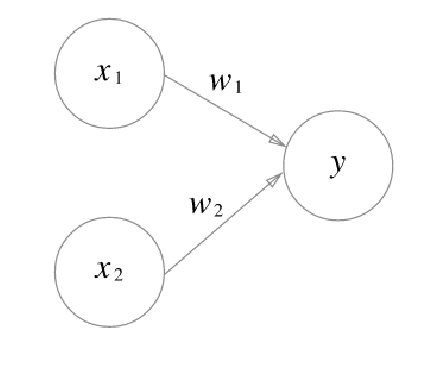

In [2]:
img = imread("./Image/Perceptron1.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 퍼셉트론은 $x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하였다. 이 퍼셉트론을 수식으로 나타내면 다음과 같다.


- $y =
\begin{cases}
0, & \mbox{b + $w_1x_1$ + $w_2x_2$ $\le$ 0 } \\
1, & \mbox{b + $w_1x_1$ + $w_2x_2$ $\gt$ 0 }
\end{cases}$


- 여기서 $b$는 편향을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화 되느냐를 제어한다. 한편, $w_1$과 $w_2$는 각 신호의 가중치를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.


- 그런데, 위의 그림에서는 편향 $b$가 보이지 않는다. 여기서 편향을 수식에 명시하면 다음과 같다.

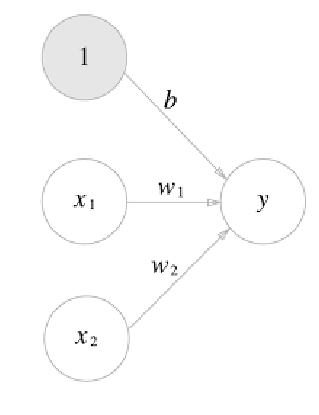

In [3]:
img = imread("./Image/bias_perceptron.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위의 그림에서 가중치가 $b$이고, 입력이 $1$인 뉴런이 추가 되었다.
 - 이 퍼셉트론의 동작은 $x_1$, $x_2$, $1$ 이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한후, 다음 뉴런에 전달한다.
 - 다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘기면 1을 출력하고, 그렇기 않으면 0을 출력한다.

 - 이를 하나의 함수 $h(x)$ 를 사용해서 표현할 수 있다.
 
 
 - $y = h(b + w_1x_1 + w_2x_2)$
 
 
 - $h(x) =
\begin{cases}
0, & \mbox{x $\le$ 0 } \\
1, & \mbox{x $\gt$ 0 }
\end{cases}$


 - 위의 식에서 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 $y$의 출력이 됨을 보여준다.

# 활성화 함수의 등장
 - 위의 식에서 처음으로 $h(x)$가 등장하였는데, 이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 "활성화 함수(Activation Function)"이라고 한다.
 
 
 - "활성화"라는 이름이 말해주든 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 결정하는 역할을 한다.
 
 
 - 위의 식을 분리시킬 수 있다. 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리한다.


   $$a = b + w_1x_1 + w_2x_2$$     
   $$y = h(a)$$    
 
 
 - 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 $a$라 한다. 그리고 $a$를 함수 $h()$에 넣어 $y$를 출력하는 흐름이다.
 
 
 - 지금까지와 같이 뉴런을 큰 원(O)으로 그려보면 다음과 같다.

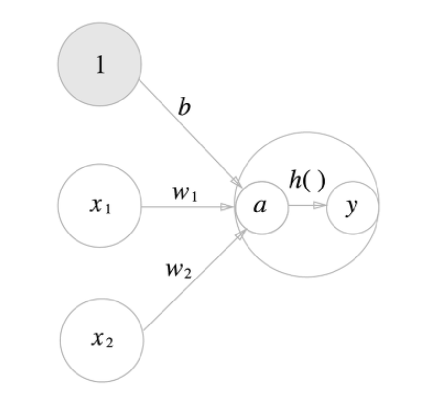

In [4]:
img = imread("./Image/active.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 일반적으로는 뉴런과 노드는 같은 용어로 쓰인다.
 - 뉴런을 그릴 때 보통은 지금까지와 마찬가지로 뉴런을 하나의 원으로 그린다.
 - 그리고, 신경망의 동장을 더 명확히 드러내고자 할 때는 활성화 처리 과정을 명시하기도 한다.

In [5]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


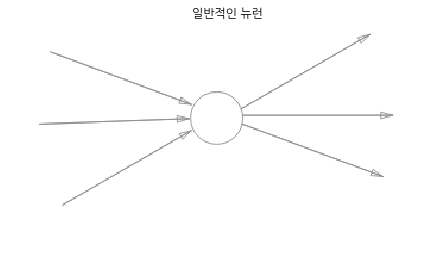

In [6]:
img = imread("./Image/active_1.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; 
plt.title("일반적인 뉴런") ;plt.show()

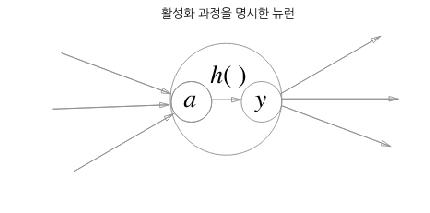

In [7]:
img = imread("./Image/active_2.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off")  ; 
plt.title("활성화 과정을 명시한 뉴런") ; plt.show()

# 활성화 함수
 - 위와 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함슈룰 계단 함수(Step Function)이라고 한다.


 - 그래서, "퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다."라고 말할 수 있다.


 - 즉, 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 사용하고 있는 것이다. 

# 시그모이드 함수
 - 시그모이드 함수(Sigmoid Function)는 신경망에서 자주 이용하는 활성화 함수이다.
 
 
 - $ h(x) = {1 \over 1 + exp(-x)} $
 
 
 - 여기서, $exp(-x)$는 $e^{-x}$를 뜻하며, $e$는 자연상수로 2.7182...의 값을 갖는 실수이다.
 
 
 - 식이 얼핏 복잡해 보이지만, 이 역시 단순한 "함수"일 뿐이다.
 
 
 - 예를 들면, 시그모이드 함수에 1.0과 2.0을 입력하면, $h(1.0) = 0.731..., h(2.0) = 0.880...,$처럼 특정 값을 출력한다.

# 계단 함수 구현하기

In [8]:
def step_function (x) : 
    
    if x > 0 : 
        return 1
    
    else : 
        return 0

 - 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.
 
 
 - 이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다.
 
 
 - 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없다.
 
 
 - 예를 들면, step_function(np.array([1.0, 2.0]))는 안 된다.
 
 
 - 넘파이 배열도 지원하기 위해 다음과 같이 수정을 해야 한다.

In [9]:
def step_function (x) : 
    
    y = x > 0
    
    return y.astype(np.int)

 - 매우 짧고 간단한 코드지만, 넘파이의 편리한 트릭을 사용한 덕분에 구현이 가능하다.
 
 
 - x라는 넘파이 배열을 생성하고, 그 넘파이 배열에 부등호 연산을 수행한다.
 - 넘파이 배열에 부등호 연산을 수행하면, 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.
 - 이 예에서는 배열 x의 원소 각각이 0보다 크면 True, 0 이하는 False로 변환한 새로운 배열 y가 생성된다.
 - 이 y는 bool 배열이다. 그런데 우리가 원하는 계단 함수는 0이나 1의 "int형"을 출력하는 함수다.
 - 그래서, 배열 y의 원소를 bool에서 int형으로 바꿔준다.

In [10]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print("x :",x)
y = x > 0
print("y :",y)
y = y.astype(np.int)
print("y :",y)

x : [-1.  1.  2.]
y : [False  True  True]
y : [0 1 1]


# 계단 함수의 그래프

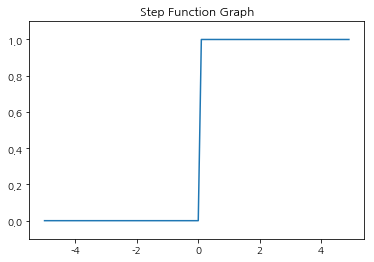

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

def step_function(x) : 
    return np.array(x>0, dtype=np.int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x,y) ; plt.ylim(-0.1,1.1) ; plt.title("Step Function Graph") ; plt.show()

 - 그림에서 보듯이 계단 함수는 0을 경계로 출력이 0에서 1 (또는 1에서 0)로 바뀐다.

# 시그모이드 함수 구현하기

In [12]:
def sigmoid(x) : 
    return 1/(1+np.exp(-x))

 - 위의 함수는 넘파이 배열이 들어와도 브로드캐스팅이 일어나 올바른 결과값을 반환한다.

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

# 시그모이드 함수 그래프

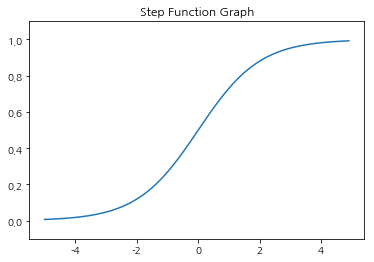

In [14]:
def sigmoid(x) : 
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y) ; plt.ylim(-0.1,1.1) ; plt.title("Step Function Graph") ; plt.show()

# 계단 함수 vs 시그모이드 함수

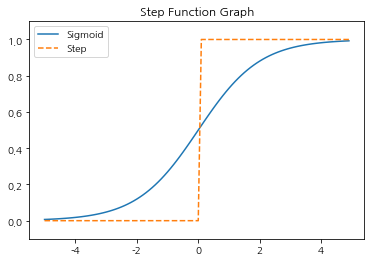

In [15]:
x = np.arange(-5, 5, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid(x)

plt.plot(x,y_sigmoid, label="Sigmoid") ; plt.plot(x,y_step, label="Step", linestyle="--")
plt.ylim(-0.1,1.1) ; plt.title("Step Function Graph") ; plt.legend() ; plt.show()

 - 위의 두 함수를 보고 가장 먼저 느껴지는 점은 "매끄러움"의 차이이다.
 
 
 - 시그모이드 함수는 부드러운 곡선이며, 입력에 따라 출력이 연속적으로 변화한다.
 
 
 - 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버린다.
 
 
 - 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.

# 비선형 함수
 - 계단 함수와 시그모이드 함수의 중요한 공통점으로, 둘 모두는 비선형 함수이다.
 
 
 - 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.
 
 
 - 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 달리 말하면, 선형 함수를 사용해서는 안 된다.
 
 
 - 그 이유는, 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.
 
 
 - 선형 함수의 문제는 층을 아무리 깊게 해도 "은닉층이 없는 네트워크"로도 똑같은 기능을 할 수 있다.
 
 
 - 예를 들면 선형 함수인 $h(x) = cx$를 활성화 함수로 사용한 3층 네트워크가 있다고 하자. 이를 식으로 나타내면 $y(x) = h(h(h(x)))$이 된다. 이 계산은 $y(x) = c*c*c*x$처럼 곱셉을 세번 수행하지만, 실제로는 $y=a(x)$와 똑같은 식이다. $a = c^3$로 설정하기만 하면 되기 때문이다.
 
 
 - 이처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 하는 이유이다.

# ReLU 함수
 - 시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나, 최근에는 ReLU(Rectified Liner Unit, 렐루)함수를 주로 이용하기 시작했다.
 
 
 - ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.
 
 
 - $h(x) =
\begin{cases}
x, & \mbox{x $\gt$ 0 } \\
0, & \mbox{x $\le$ 0 }
\end{cases}$

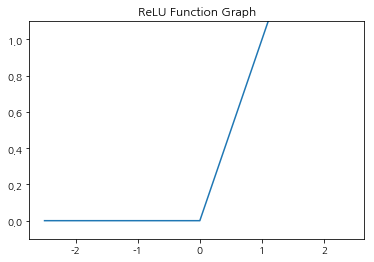

In [16]:
def ReLU_function(x) : 
    return np.maximum(0,x)

x = np.arange(-2.5, 2.5, 0.1)
y = ReLU_function(x)

plt.plot(x,y) ; plt.ylim(-0.1,1.1) ; plt.title("ReLU Function Graph") ; plt.show()

# 다차원 배열의 계산
 - 넘파이의 다차원 배열을 사용한 계산법을 숙달하면, 신경망을 효율적으로 구현할 수 있다.

# 다차원 배열
 - 다차원 배열도 그 기본은 "숫자의 집합"이다. 숫자가 한 줄로 늘어선 것인 직사각형으로 늘어놓은 것. 3차원으로 늘어놓은 것이나 N차원으로 나열하는 것을 통틀어 차원 배열이라고 한다.
 
 
 - 배열의 차원 수는 np.dim() 함수로 확인할 수 있다.
 - 또 배열의 형상은 인스턴스 변수인 shape로 알 수 있다.

In [17]:
# 1차원 배열
import numpy as np
A = np.array([1,2,3,4])
print(A) ; print(np.ndim(A)) ; print(A.shape) ; print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [18]:
# 2차원 배열
import numpy as np
B = np.array([[1,2],[3,4],[5,6]])
print(B) ; print(np.ndim(B)) ; print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


 - 배열 B는 "3X2 배열"이다. 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 뜻이다.
 
 
 - 이 때, 처음 차원은 0번째 차원, 다음 차원은 1번째 차원에 대응한다.


- 2차원 배열은 특히 행렬(Matrix)이라고 부르고, 배열의 가로 방향을 행(row), 세로 방향을 열(column)이라고 부른다.

# 행렬의 곱

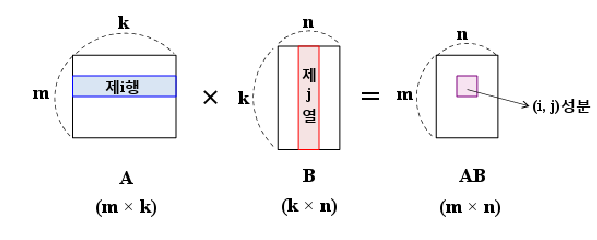

In [19]:
img = imread("./Image/matrix.png") ; plt.figure(figsize=(10,10)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 행렬의 곱은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산한다.
 
 
 - 따라서, 행렬의 곱이 되기 위해서는 앞의 행렬의 열의 개수와 뒤의 행렬의 행의 개수가 같아야 된다.
 
 
 - 예를 들면, 2x3과 3x4는 곱셈이 가능하지만, 3x4와 2x3은 행렬의 곱이 불가능하다.
 
 
 - 행렬의 곱으로 계산된 결과의 행렬은 앞의 행렬의 행과 뒤의 행렬의 열의 개수를 갖는다.

In [20]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [21]:
# 행렬의 곱
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [22]:
# 행렬의 곱
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])

np.dot(A,B)

array([23, 53, 83])

# 신경망에서의 행렬 곱

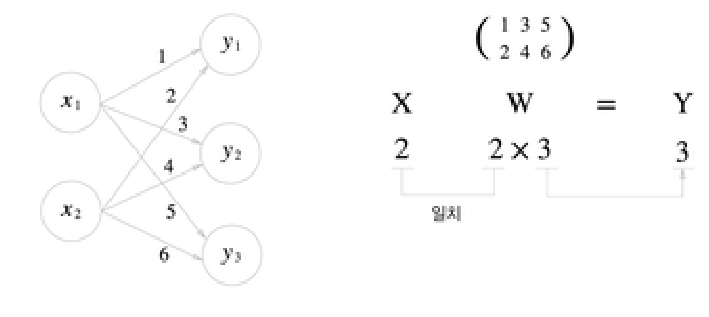

In [23]:
img = imread("./Image/nn_matrix.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

In [24]:
X = np.array([1,2])
X.shape

(2,)

In [25]:
w = np.array([[1,3,5],[2,4,6]])
w.shape

(2, 3)

In [26]:
Y = np.dot(X,w)
print(Y)

[ 5 11 17]


# 3층 신경망 구현하기

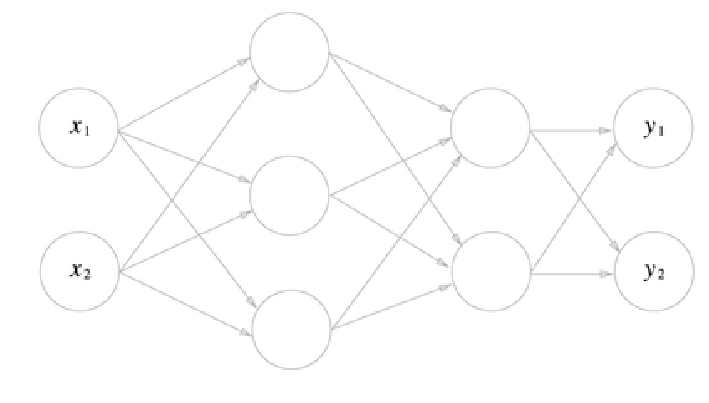

In [27]:
img = imread("./Image/3rd_nn.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 신경망은 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.


 - 신경망에서의 계산은 행렬 계산으로 정리할 수 있다. 신경망 각 층의 계산은 행렬의 곱으로 처리할 수 있다. 

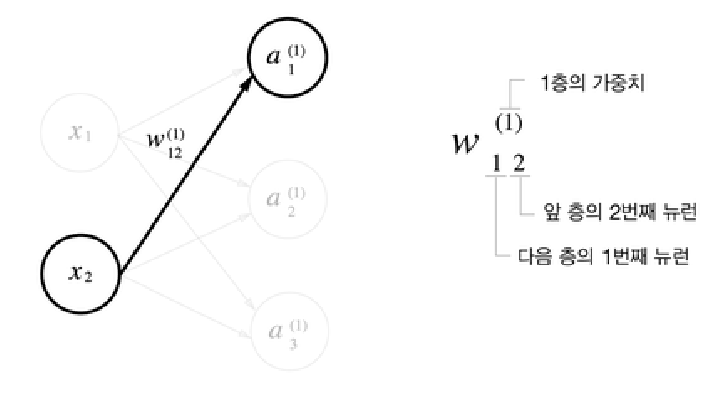

In [28]:
img = imread("./Image/sign.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 그림을 보면, 가중치와 은닉층 뉴런의 오른쪽 위에 $^{(1)}$ 이 붙어 있는 것을 알 수 있다. 이는 1층의 가중치, 1층의 뉴런이라는 뜻이다. 또 가중치의 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호다.
 
 
 - 예를 들면, $w_{12}^{(1)}$ 는 앞층의 2번째 뉴런에서 다음층의 1번째 뉴런으로 가는 1층의 가중치라는 뜻이다.

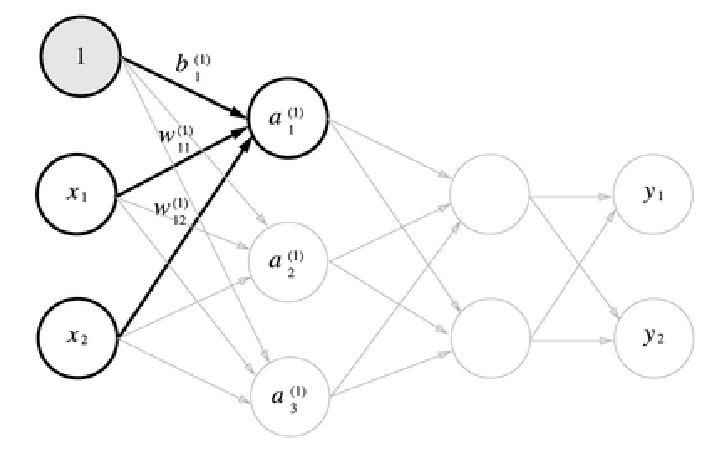

In [29]:
img = imread("./Image/1nd_touch.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 그림은, 입력층에서 "1층의 첫 번째 뉴런"으로 가는 신호를 표현한 것이다.
 
 
 - 편향을 뜻하는 뉴런인 "$1$"과 그 가중치 "$b_{1}^{(1)}$"가 포함이 되었다. 편향은 오른쪽 아래 인덱스가 하나 밖에 없다. 이는 앞 층의 편향 뉴런이 하나뿐이기 때문이다.
 
 
 - 전달 받은 $a_{1}^{(1)}$를 수식으로 나타내면, $a_{1}^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_{1}^{(1)}$이 된다.
 
 
 - 여기에 행렬의 곱을 이용하면 1층의 "가중치"부분을 다음의 식처럼 간소화할 수 있다. $A^{(1)} = XW^{(1)} + B^{(1)}$
 
 
 - 이 때, $A^{(1)} = (a_{1}^{(1)}, a_{2}^{(1)}, a_{3}^{(1)})$,$X = (x_1, x_2)$, $B^{(1)} = (b_{1}^{(1)}, b_{2}^{(1)}, b_{3}^{(1)})$, $W^{(1)} = \begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \end{pmatrix}	$

In [30]:
# 위의 1층을 넘파이 배열로 구현
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

print(A1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]


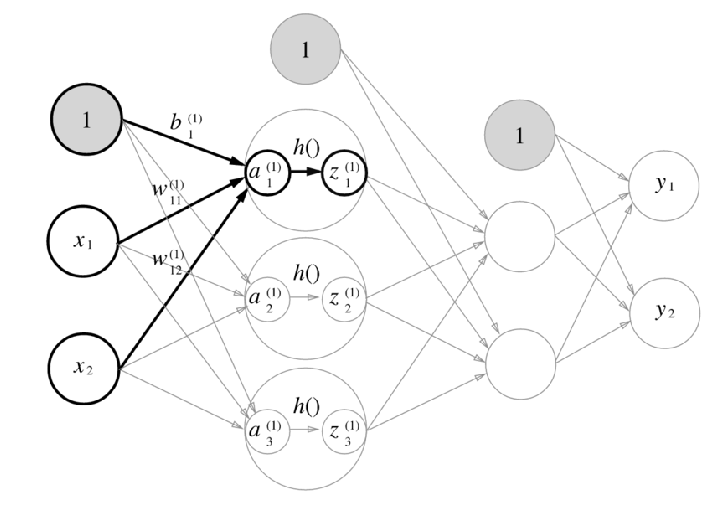

In [31]:
img = imread("./Image/1th_connect.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 그림은 입력층에서 1층으로 신호를 전달할 때 활성화 함수의 처리를 한 것이다.
 
 
 - 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 $a$로 표기하고 활성 함수 $h()$로 변환된 신호를 $z$로 표기한다.
 
 
 - 활성화 함수로는 시그모이드 함수를 사용한다.

In [32]:
# 함수 구현
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


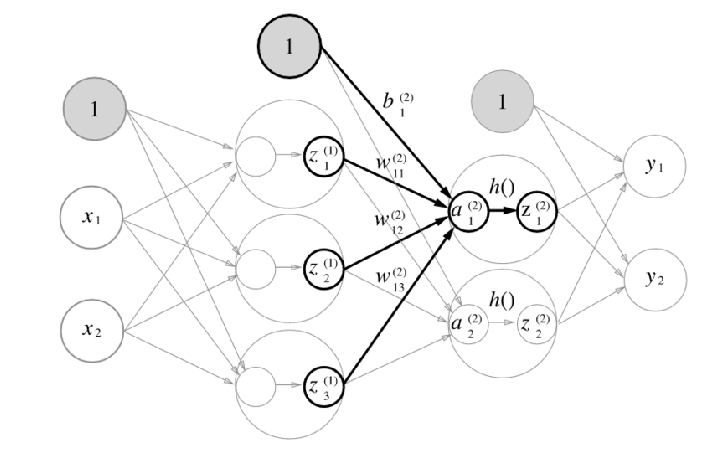

In [33]:
img = imread("./Image/1th_2nd.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 그림은 1층에서 2층으로 가는 과정을 그린 것이다.

In [34]:
# 1층에서 2층으로 가는 과정 구현
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


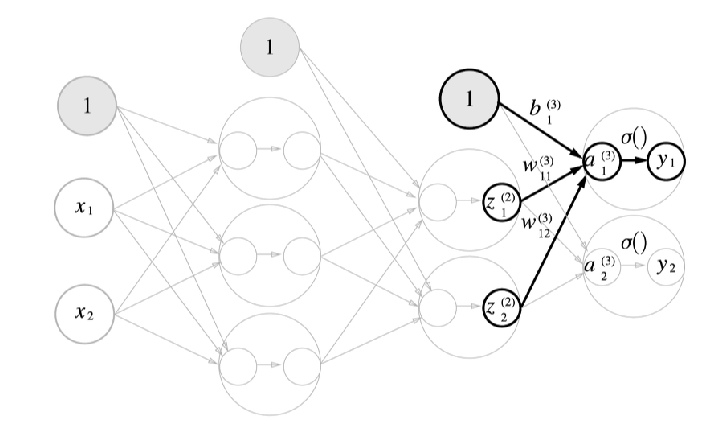

In [35]:
img = imread("./Image/2nd_3rd.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 위의 그림은 2층에서 마지막 출력층으로 가는 과정이다.
 
 - 마지막 시그모이드 함수 대신에 항등 함수(자기 자신을 출력하는 함수)를 사용하고, 기호로 $\sigma()$를 사용하였다.

In [36]:
# 2층에서 마지막 출력층으로 가는 과정 구현
def identity_function(x) : 
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) +B3
Y = identity_function(A3)

# 3층 신경망 구현 정리

In [37]:
# 가중치와 편향 초기화하는 함수
def init_network() :
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([[0.1, 0.2, 0.3]])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([[0.1, 0.2]])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([[0.1, 0.2]])
    return network

# 3층 신경망 구현
# forward : 순방향, 입력에서 출력으로
def forward(network, x) : 
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    # Input -> 1th Hidden
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    # 1th Hidden -> 2nd Hidden
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    # 2nd Hidden -> Output
    a3 = np.dot(z2, W3) + b3
    y = a3
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[[0.31682708 0.69627909]]


# 출력층 설계하기
 - 신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

# 항등 함수와 소프트맥스 함수 구현하기
 - 항등 함수는 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 듯의 항등이다.
 
 
 - 항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 그린다.

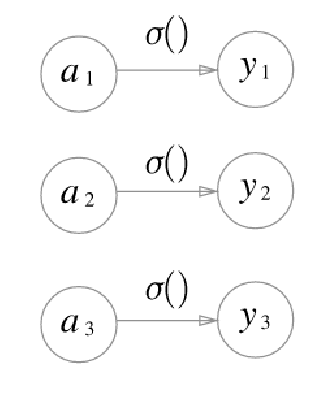

In [38]:
img = imread("./Image/def_fun.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 한편, 분류에서 사용하는 소프트 맥스의 식은 다음과 같다.
 
 
 - $ y_k = {exp(a_k) \over \sum_{i=1}^n{exp(a_i)}} $
 
 
 - $exp(x)$는 $e^x$를 뜻하는 지수 함수이다. $n$은 출력층의 뉴런 수, $y_k$는 그 중 $k$번째 출력임을 뜻한다.
 
 
 - 이 소프트맥스 함수를 그림으로 나타내면 다음과 같다. 분모에서 보듯, 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

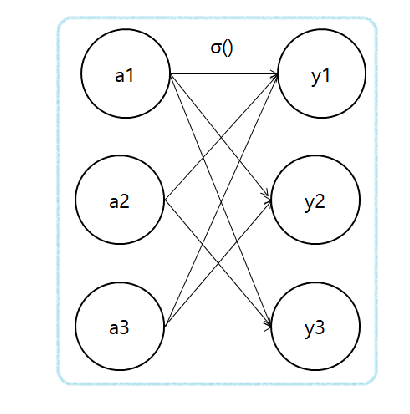

In [39]:
img = imread("./Image/softmax.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

In [40]:
# 소프트맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)

sum_exp_a = np.sum(a)

y = exp_a / sum_exp_a

print(y)


# 함수로 정의
def softmax(a) : 
    return np.exp(a) / np.sum(a)

[0.18748039 2.52418686 7.58307639]


# 소프트맥스 함수 구현 시 주의점
 - 이 소프트맥스를 컴퓨터가 계산할 때 결함이 있다. 바로 오버플로우 문제이다.


 - 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 종종 매우 큰 값을 낸다.
 
 
 - 예를 들면, $e^10$은 $20,000$이 넘고, $e^{100}$은 $0$이 40개가 넘는 큰 값이 되고,$e^1000$은 무한대를 뜻하는 "inf" 값을 반환한다. 
 
 
 - 그리고, 이런 큰 값끼리 나눗셈이나 곱셉을 하면 결과 수치가 매우 불안정해진다.
 
 
 - 따라서, 이러한 문제를 해결하도록 소프트맥스 함수의 수식을 개선할 필요가 있다.
 
 
 - $ y_k = {exp(a_k) \over \sum_{i=1}^n{exp(a_i)}}= {Cexp(a_k) \over C\sum_{i=1}^n{exp(a_i)}} = {exp(a_k + \log{C}) \over \sum_{i=1}^n{exp(a_i + \log{C})}} = {exp(a_k + C^{'}) \over \sum_{i=1}^n{exp(a_i + C^{'})}}$
 
 
 - 먼저, 분모와 분자에 "C"라는 임의의 정수를 곱했다. 그 다음으로 $C$를 지수 함수 $exp()$ 안으로 옮겨 $\log(C)$로 만들었다. 마지막으로 $\log(C)$를 $C^{'}$라는 새로운 기호로 바꾼다.
 
 
 - 위의 식이 말하고자 하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다는 것이다.
 
 
 - 여기에 어떤 $C$ 값을 대입해도 상관없지만, 오버플로우를 막기 위한 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [41]:
# 수정된 소프트맥스 함수
a = np.array([1010, 1000, 900])

def softmax(a) : 
    return np.exp(a - np.max(a)) / np.sum(np.exp(a - np.max(a)))

softmax(a)

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

# 소프트맥스 함수의 특징
 - 소프트맥스 함수의 출력은 각각 0에서 1 사이의 실수이다. 또 소프트맥스 함수 출력의 총합은 1이다.
 
 - 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다.
 
 
 - 이 성질 덕분에 소프트맥스 함수의 출력을 "확률"로 해석할 수 있다.
 
 
 - 예를 들면 y[0]의 확률은 0.018(1.8%), y[1]의 확률은 0.245(24.5%), y[2]의 확률은 0.737(73.7%)로 해석할 수 있다. 그리고 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다."라고 할 수 있다. 혹은 "74%의 확률르 2번째 클래스, 25%의 확률로 1번째 클래스, 1%의 확률ㄹ 0번째 클래스다."라는 확률적인 결론도 낼 수 있다.

In [42]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) ; print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


 - 여기서 주의할 점은, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 이는 지수 함수 $y = e^{x}$가 단조 증가 함수이기 때문이다.
 
 
 - 실제로, 앞의 예에서 $a$의 원소들 사이의 대소 관계가 $y$의 원소들 사이의 대소 관계로 그대로 이어진다.
 
 
 - 예를 들어, $a$에서 가장 큰 원소는 2번째 원소 4.0이고, $y$에서 가장 큰 원소도 2번째 원소 0.7365이다.
 
 
 
 - 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.

# 출력층의 뉴런 수 정하기
 - 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.
 
 
 - 예를 들어, 입력 이미지를 숫자 0부터 9까지 분류하는 문제라면 출력층의 뉴런을 10개로 정해야 한다. 출력층은 위에서부터 차례로 0,1,2, ... , 9에 대응한다. 가장 큰 출력층이 3이라면 그 이미지는 3이라는 숫자로 인식할 것이다.

# 손글씨 숫자 인식
 - 이번에는 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론과정만 구현한다.
 
 
 - 이 추론 과정을 신경망의 순전파(Forward Propagation)이라고도 한다.

# MNIST DATASET
 - MNIST는 손글씨 숫자 이미지 집합이다.
 
 
 - MNIST는 기계학습 분야에서 아주 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용되고 있다.
 
 
 - MNIST 데이터셋은 0부터 9까지 숫자 이미지로 구성된다. 훈련 이미지가 60,000장 ,시험 이미지가 10,000장 준비되어 있다. 일반적으로 훈련 이미지들을 사용하여 모델을 학습하거, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지를 평가한다.
 
 
 - MNIST의 이미지 데이터는 28 X 28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0 ~ 255 사이의 값을 취한다. 
 
 
 - 각 이미지에는 또한 "7", "2", "1" 과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있다.

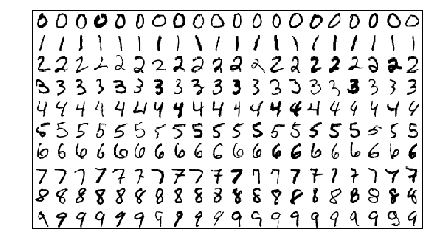

In [43]:
img = imread("./Image/mnist.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

In [44]:
# MNIST 데이터 넘파이로 불러오기

# 라이브러리
import sys
import os

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)

# 라이브러리
from mnist import load_mnist

# 데이터 불러들이기
# flatten = True : 입력 이미지의 배열을 1차원 배열로 받을 것인지, 1 X 28 X 28 로 유지할지 결정
# normalize = False : 입력 이미지의 픽셀을 0 ~ 255 사이의 숫자 그대로 받을 것인지, 0 ~ 1 사이의 숫자로 정규화 할 것인지 결정
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장할 수 있다. 예를 들면 "3"으로 저장할 것인지, [0,0,0,1,0,0,0,0,0,0]로 할 것인지...
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) ; print(t_train.shape) ; print(x_test.shape) ; print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [45]:
# MNIST 이미지 화면으로 불러보기
from PIL import Image

def img_show(img) : 
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img, label = x_train[0], t_train[0]

print("label :",label)
print("불러온 이미지의 모양 :",img.shape)
print("원래 이미지의 모양 :",img.reshape(28,28).shape)

img_show(img.reshape(28,28))

label : 5
불러온 이미지의 모양 : (784,)
원래 이미지의 모양 : (28, 28)


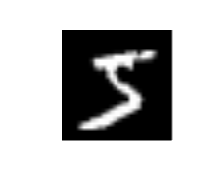

In [46]:
img = imread("./Image/mnist_0.png") ; plt.figure(figsize=(3,3)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

# 신경망 추론 처리
 - MNIST 데이터를 가지고 추론을 수행하는 신경망을 구현
 
 
 - 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다. 입력층 뉴런이 784개인 이뉴는 이미지 크기가 1 X 28 X 28 = 784 이기 때문이고, 출력층이 10개인 이뉴는 문제가 0 ~ 9 사이의 숫자를 구분하는 문제이기 때문이다.
 
 
 - 으닉층은 총 2개로, 첫 번째 은닉층에서는 50ㄱ의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치한다.

In [47]:
# 라이브러리
import pickle

# 데이터를 받는 함수
def get_data() : 
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
    return x_test, t_test

# 학습된 샘플 매개변수 불러오는 함수
def init_network():
    with open("sample_weight.pkl", 'rb') as f :
        network = pickle.load(f)
    return network
        
# 추론 함수
def predict(network, x) : 
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
        
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

In [48]:
# 데이터 불러오기
x, t = get_data()

# 추정된 매개변수 불러오기
network = init_network()

# 정확도 카운트
accuracy_cnt = 0

for i in range(len(x)) : 
    
    # 예측값
    y = predict(network, x[i])
    
    # 가장 높은 값 반환
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    
    # label을 맞춘 경우 카운트
    if p == t[i] : 
        accuracy_cnt = accuracy_cnt + 1

print("Accuracy :", str(float(accuracy_cnt) / len(x)))    

Accuracy : 0.9207


 - 정확도가 0.9207이라는 말은 92.07%를 올바르게 분류했다는 뜻이다.
 
 
 - 이 수치도 매우 높은 수치이긴 하지만, 이제부터는 신경망의 학습 과정을 통해 99% 이상의 정확도를 보이는 신경망을 구축할 수 있다.

# 배치 처리
 - 입력 데이터와 가중치 매개변수의 "형태"에 주의해서 살펴보자.

In [49]:
x,_ = get_data()
network = init_network()
W1,W2,W3 = network["W1"], network["W2"], network["W3"]

In [50]:
x.shape

(10000, 784)

In [51]:
x[0].shape

(784,)

In [52]:
W1.shape

(784, 50)

In [53]:
W2.shape

(50, 100)

In [54]:
W3.shape

(100, 10)

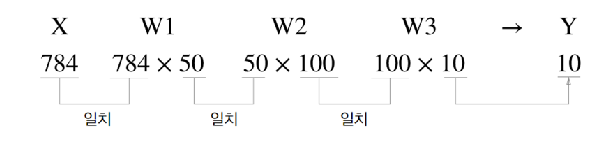

In [55]:
img = imread("./Image/batch_1.png") ; plt.figure(figsize=(10,10)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - 전체적으로 보면, 원소 784(28X28)개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름이다.
 
 
 - 하지만, 이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름이다.
 
 
 - 그렇다면, 이미지를 여러 장 한꺼번에 입력하면 어떻게 될까?
 
 
 - 예를 들면, 이미지 100장을 한 번에 넘기는 것을 생각해보자.

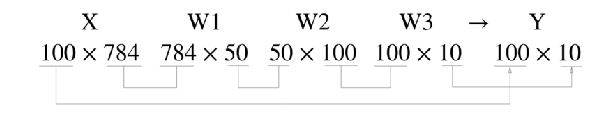

In [56]:
img = imread("./Image/batch_2.png") ; plt.figure(figsize=(10,10)) ; plt.imshow(img) ; plt.axis("off")  ; plt.show()

 - x의 형상을 100X784로 바꾸고, 출력 y를 100X10으로 출력하는 형태이다.
 
 
 - 이렇게, 하나로 묶은 입력 데이터를 배치(Batch)라고 한다.
 
 
 - 배치 처리는 컴퓨터로 계산할 때 큰 이점을 준다. 이미지 1장당 처리 시간을 대폭 줄ㅇ주는 것이다. 그 이유는 크게 2가지인데, 하나는 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화 되어 있기 때문이다. 그리고 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄인다는 것이 두 번째 이유이다.

In [57]:
# 배치 처리 구현

x,t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0 # 정확도 계산

# 이미지 데이터를 100개 단위로 처리
for i in range(0, len(x), batch_size) :
    
    # 배치사이즈는 100개씩 끊어서
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    
    # 예측값중 가장 큰 값
    p = np.argmax(y_batch, axis=1)
    
    # 각 배치에서 맞은 개수 카운트
    accuracy_cnt = accuracy_cnt + np.sum(p == t[i:i+batch_size])
    
print("Accuracy :", str(float(accuracy_cnt/len(x))))

Accuracy : 0.9207


In [58]:
# np.argmax()
x = np.array([[0.1,0.8,0.1],
              [0.3,0.1,0.6],
              [0.2,0.5,0.3],
              [0.8,0.1,0.1]])

# 0.1, 0.8, 0.1 중에서 가장 큰 값 0.8의 인덱스 1
# 0.3, 0.1, 0.6 중에서 가장 큰 값 0.6의 인덱스 2
# ... 이렇게 출력된다.
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [59]:
# 정답 비교
y_pred = np.array([1,2,1,0])
y_true = np.array([1,2,0,0])

# 비교해서 각 bool형으로 반환
print(y_pred == y_true)

# True의 개수를 카운트
print(np.sum(y_pred == y_true))

[ True  True False  True]
3
